# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import api keys
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

634


In [4]:
### Perform API Calls
#* Perform a weather check on each city using a series of successive API calls.
#* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | kautokeino
Processing Record 4 of Set 1 | kabo
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | salalah
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | isangel
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | hastings
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | mochudi
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | kapoeta
City not found. Skipping...
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | manggar
Processing Record 20 of Set 1 | ponta do sol
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | 

Processing Record 37 of Set 4 | aromashevo
Processing Record 38 of Set 4 | mushie
Processing Record 39 of Set 4 | bathsheba
Processing Record 40 of Set 4 | nishihara
Processing Record 41 of Set 4 | hami
Processing Record 42 of Set 4 | velingara
Processing Record 43 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 44 of Set 4 | jiwani
Processing Record 45 of Set 4 | vuktyl
Processing Record 46 of Set 4 | takaka
Processing Record 47 of Set 4 | natal
Processing Record 48 of Set 4 | vostok
Processing Record 49 of Set 4 | saint-philippe
Processing Record 0 of Set 5 | vilcun
Processing Record 1 of Set 5 | cayenne
Processing Record 2 of Set 5 | hermanus
Processing Record 3 of Set 5 | ondorhaan
City not found. Skipping...
Processing Record 4 of Set 5 | krasnoselkup
City not found. Skipping...
Processing Record 5 of Set 5 | taltal
Processing Record 6 of Set 5 | adrar
Processing Record 7 of Set 5 | verkhnevilyuysk
Processing Record 8 of Set 5 | belebey
Processing Record 9 of Se

Processing Record 27 of Set 8 | bethel
Processing Record 28 of Set 8 | kupang
Processing Record 29 of Set 8 | sibolga
Processing Record 30 of Set 8 | arcata
Processing Record 31 of Set 8 | praia da vitoria
Processing Record 32 of Set 8 | aklavik
Processing Record 33 of Set 8 | suba
Processing Record 34 of Set 8 | tunduru
City not found. Skipping...
Processing Record 35 of Set 8 | deputatskiy
Processing Record 36 of Set 8 | rundu
Processing Record 37 of Set 8 | lasa
Processing Record 38 of Set 8 | garowe
Processing Record 39 of Set 8 | shelburne
Processing Record 40 of Set 8 | oranjemund
Processing Record 41 of Set 8 | roald
Processing Record 42 of Set 8 | ayagoz
Processing Record 43 of Set 8 | tautira
Processing Record 44 of Set 8 | saint-pierre
Processing Record 45 of Set 8 | bolshoy tsaryn
City not found. Skipping...
Processing Record 46 of Set 8 | raudeberg
Processing Record 47 of Set 8 | montepuez
Processing Record 48 of Set 8 | estelle
Processing Record 49 of Set 8 | kang
Processi

Processing Record 8 of Set 12 | kathmandu
Processing Record 9 of Set 12 | suntar
Processing Record 10 of Set 12 | bodden town
Processing Record 11 of Set 12 | havre-saint-pierre
Processing Record 12 of Set 12 | soe
Processing Record 13 of Set 12 | rochegda
Processing Record 14 of Set 12 | pangai
Processing Record 15 of Set 12 | ypsonas
Processing Record 16 of Set 12 | pakokku
Processing Record 17 of Set 12 | saleaula
City not found. Skipping...
Processing Record 18 of Set 12 | miyako
Processing Record 19 of Set 12 | namatanai
Processing Record 20 of Set 12 | sinjar
Processing Record 21 of Set 12 | san jose
Processing Record 22 of Set 12 | cape elizabeth
City not found. Skipping...
Processing Record 23 of Set 12 | alice town
Processing Record 24 of Set 12 | chake chake
Processing Record 25 of Set 12 | corinto
Processing Record 26 of Set 12 | saint-joseph
Processing Record 27 of Set 12 | vrangel
Processing Record 28 of Set 12 | porto torres
Processing Record 29 of Set 12 | cravo norte
Pr

In [8]:
# OpenWeatherMap API Key
#api_key = api_keys.api_key

# List of city data
city_data = []

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+api_key
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counter
record_count = 1
set_count = 1

#loop through all the cities 
for i, city in enumerate (cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
 # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-kurilsk
City not found. Skipping...
Processing Record 2 of Set 1 | bluff
City not found. Skipping...
Processing Record 3 of Set 1 | kautokeino
City not found. Skipping...
Processing Record 4 of Set 1 | kabo
City not found. Skipping...
Processing Record 5 of Set 1 | rikitea
City not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 7 of Set 1 | lebu
City not found. Skipping...
Processing Record 8 of Set 1 | avarua
City not found. Skipping...
Processing Record 9 of Set 1 | salalah
City not found. Skipping...
Processing Record 10 of Set 1 | kodiak
City not found. Skipping...
Processing Record 11 of Set 1 | isangel
City not found. Skipping...
Processing Record 12 of Set 1 | qaanaaq
City not found. Skipping...
Processing Record 13 of Set 1 | hastings
City not found. Skipping...
Processing Record 14 of Set 1 | punta arenas
City not found. Ski

City not found. Skipping...
Processing Record 19 of Set 3 | tarudant
City not found. Skipping...
Processing Record 20 of Set 3 | port alfred
City not found. Skipping...
Processing Record 21 of Set 3 | pangnirtung
City not found. Skipping...
Processing Record 22 of Set 3 | hamilton
City not found. Skipping...
Processing Record 23 of Set 3 | bengkulu
City not found. Skipping...
Processing Record 24 of Set 3 | roches noires
City not found. Skipping...
Processing Record 25 of Set 3 | vila franca do campo
City not found. Skipping...
Processing Record 26 of Set 3 | okha
City not found. Skipping...
Processing Record 27 of Set 3 | tura
City not found. Skipping...
Processing Record 28 of Set 3 | faanui
City not found. Skipping...
Processing Record 29 of Set 3 | gangapur
City not found. Skipping...
Processing Record 30 of Set 3 | belushya guba
City not found. Skipping...
Processing Record 31 of Set 3 | mangochi
City not found. Skipping...
Processing Record 32 of Set 3 | ribeira grande
City not f

City not found. Skipping...
Processing Record 38 of Set 5 | kavieng
City not found. Skipping...
Processing Record 39 of Set 5 | tasiilaq
City not found. Skipping...
Processing Record 40 of Set 5 | talnakh
City not found. Skipping...
Processing Record 41 of Set 5 | jacareacanga
City not found. Skipping...
Processing Record 42 of Set 5 | alofi
City not found. Skipping...
Processing Record 43 of Set 5 | xingyi
City not found. Skipping...
Processing Record 44 of Set 5 | minas
City not found. Skipping...
Processing Record 45 of Set 5 | lavrentiya
City not found. Skipping...
Processing Record 46 of Set 5 | jalu
City not found. Skipping...
Processing Record 47 of Set 5 | batagay-alyta
City not found. Skipping...
Processing Record 48 of Set 5 | nizwa
City not found. Skipping...
Processing Record 49 of Set 5 | gat
City not found. Skipping...
Processing Record 0 of Set 6 | olafsvik
City not found. Skipping...
Processing Record 1 of Set 6 | geraldton
City not found. Skipping...
Processing Record 

City not found. Skipping...
Processing Record 26 of Set 10 | cherskiy
City not found. Skipping...
Processing Record 27 of Set 10 | quatre cocos
City not found. Skipping...
Processing Record 28 of Set 10 | zyryanka
City not found. Skipping...
Processing Record 29 of Set 10 | brigantine
City not found. Skipping...
Processing Record 30 of Set 10 | la macarena
City not found. Skipping...
Processing Record 31 of Set 10 | hihifo
City not found. Skipping...
Processing Record 32 of Set 10 | bandarbeyla
City not found. Skipping...
Processing Record 33 of Set 10 | warqla
City not found. Skipping...
Processing Record 34 of Set 10 | maryville
City not found. Skipping...
Processing Record 35 of Set 10 | bani walid
City not found. Skipping...
Processing Record 36 of Set 10 | astaneh-ye ashrafiyeh
City not found. Skipping...
Processing Record 37 of Set 10 | ugoofaaru
City not found. Skipping...
Processing Record 38 of Set 10 | santa rosa
City not found. Skipping...
Processing Record 39 of Set 10 | bu

City not found. Skipping...
Processing Record 43 of Set 12 | muroto
City not found. Skipping...
Processing Record 44 of Set 12 | broome
City not found. Skipping...
Processing Record 45 of Set 12 | toguchin
City not found. Skipping...
Processing Record 46 of Set 12 | inhambupe
City not found. Skipping...
Processing Record 47 of Set 12 | nome
City not found. Skipping...
Processing Record 48 of Set 12 | lanigan
City not found. Skipping...
Processing Record 49 of Set 12 | baillif
City not found. Skipping...
Processing Record 0 of Set 13 | sao felix do xingu
City not found. Skipping...
Processing Record 1 of Set 13 | lisala
City not found. Skipping...
Processing Record 2 of Set 13 | imbituba
City not found. Skipping...
Processing Record 3 of Set 13 | passi
City not found. Skipping...
Processing Record 4 of Set 13 | eyl
City not found. Skipping...
Processing Record 5 of Set 13 | cascais
City not found. Skipping...
Processing Record 6 of Set 13 | pavino
City not found. Skipping...
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          568
Cloudiness    568
Country       568
Date          568
Humidity      568
Lat           568
Lng           568
Max Temp      568
Wind Speed    568
dtype: int64

In [7]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,64,RU,1540101884,97,50.68,156.12,42.25,4.38
1,bluff,20,AU,1540101492,38,-23.58,149.07,89.86,4.72
2,kautokeino,92,NO,1540101884,97,69.01,23.04,33.34,12.66
3,kabo,0,CF,1540101885,68,7.69,18.62,82.03,3.83
4,rikitea,92,PF,1540101885,100,-23.12,-134.97,73.53,7.18


In [ ]:
# Plotting the Data
#* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

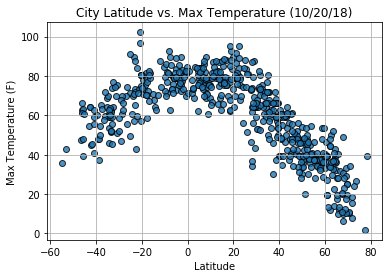

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#Latitude vs. Humidity Plot

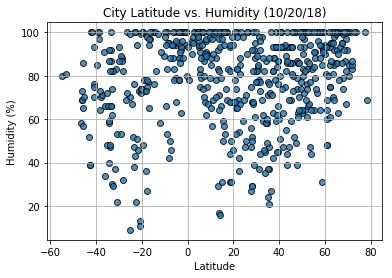

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

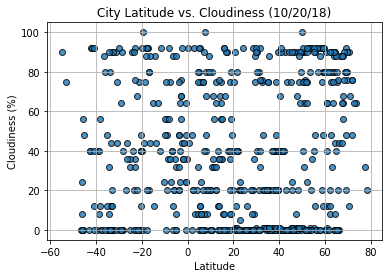

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

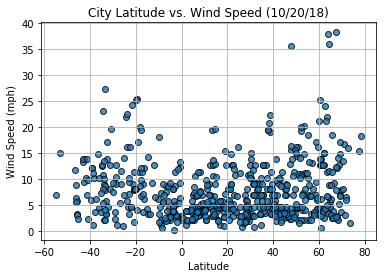

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()